# Visualize the creation of synthetic data

Here, we we will use the module `my28brains/datasets/synthetic.py` to:
- generate synthetic meshes of spheres and ellipsoids,
- generate synnthetic mesh geodesics both parameterized and unparameterized.
We will also look into the geodesics generated in `data/synthetic` to evaluate if they look good.

This will ensure that this module works correctly and that we can use it to test our geodesic regressions schemes.

Note: if an error arises with pykeops, make sure that the "compiled shared objects" (.so files on Unix, .dylib on macOS) are stored in the folder ~/.cache/keops/, where ~ is the path to your home folder. If there are not there, then from your terminal:

```
conda activate my28brains
python
```

and in the python shell:
```
import pykeops
```

This should build the necessary files.

In [1]:
import setcwd

setcwd.main()

Working directory:  /home/adele/code/my28brains/my28brains
Directory added to path:  /home/adele/code/my28brains
Directory added to path:  /home/adele/code/my28brains/my28brains
Directory added to path:  /home/adele/code/my28brains/H2_SurfaceMatch


In [2]:
import os

import numpy as np
import trimesh

In [3]:
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
from geomstats.geometry.discrete_surfaces import (
    DiscreteSurfaces,
    ElasticMetric,
    _ExpSolver,
)

INFO: Using pytorch backend


In [4]:
import my28brains.datasets.synthetic as synthetic
import my28brains.default_config as default_config
import my28brains.viz as viz
import my28brains.datasets.utils as data_utils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[KeOps] Compiling cuda jit compiler engine ... 
[KeOps] Warning : There were warnings or errors compiling formula :
/usr/bin/ld: cannot find -lnvrtc: No such file or directory
collect2: error: ld returned 1 exit status

OK
[pyKeOps] Compiling nvrtc binder for python ... 
[KeOps] Warning : There were warnings or errors compiling formula :
/usr/bin/ld: cannot find -lnvrtc: No such file or directory
collect2: error: ld returned 1 exit status

OK


# Inspect generation of synthetic meshes: spheres, ellipsoids, pills

In [5]:
mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (642, 3).


TrackedArray([[-14194.74002722,  22967.57182551,      0.        ],
              [ 14194.74002722,  22967.57182551,      0.        ],
              [-14194.74002722, -22967.57182551,      0.        ],
              ...,
              [-24650.52730917, -10789.39039595,   2222.73666086],
              [-26092.60012987,  -3585.39687435,   5943.15974178],
              [-26024.25411363,  -7192.92693063,      0.        ]])

Array of faces has shape: (1280, 3).


TrackedArray([[  0, 532, 196],
              [532, 137, 534],
              [196, 534,  53],
              ...,
              [443,  98, 453],
              [455, 453, 118],
              [443, 453, 455]])

In [6]:
mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[10, 2, 2]
)
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (642, 3).


TrackedArray([[-141947.40027217,   45935.14365101,       0.        ],
              [ 141947.40027217,   45935.14365101,       0.        ],
              [-141947.40027217,  -45935.14365101,       0.        ],
              ...,
              [-246505.27309172,  -21578.7807919 ,    4445.47332173],
              [-260926.00129866,   -7170.79374871,   11886.31948356],
              [-260242.54113626,  -14385.85386127,       0.        ]])

Array of faces has shape: (1280, 3).


TrackedArray([[  0, 532, 196],
              [532, 137, 534],
              [196, 534,  53],
              ...,
              [443,  98, 453],
              [455, 453, 118],
              [443, 453, 455]])

In [7]:
mesh = synthetic.generate_mesh(mesh_type="pill")
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (1922, 3).


TrackedArray([[ 6.12323400e-17,  0.00000000e+00, -1.50000000e+00],
              [ 1.01168322e-01,  0.00000000e+00, -1.49486932e+00],
              [ 2.01298520e-01,  0.00000000e+00, -1.47952994e+00],
              ...,
              [ 2.97921608e-01, -2.93427172e-02,  1.45413926e+00],
              [ 2.00329213e-01, -1.97307053e-02,  1.47952994e+00],
              [ 1.00681169e-01, -9.91622961e-03,  1.49486932e+00]])

Array of faces has shape: (3840, 3).


TrackedArray([[   1,    0,   32],
              [   1,   32,    2],
              [   2,   32,   33],
              ...,
              [1920,   29, 1921],
              [1921,   29,   30],
              [1921,   30,   31]])

# Inspect generation of geodesics

This computation takes several minutes.

## Parameterized

In [8]:
start_mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
end_mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[5, 2, 2]
)

(
    parameterized_geod,
    parameterized_faces,
    _,
    _,
    _,
) = synthetic.generate_parameterized_geodesic(
    start_mesh=start_mesh, end_mesh=end_mesh, n_times=5, n_steps=3
)

Geodesic function created. Computing points along geodesic...


Done.


In [9]:
geod = parameterized_geod
faces = parameterized_faces
print(geod.shape)
print(faces.shape)

mesh1 = trimesh.Trimesh(vertices=geod[0], faces=faces)
mesh2 = trimesh.Trimesh(vertices=geod[1], faces=faces)
mesh3 = trimesh.Trimesh(vertices=geod[2], faces=faces)
mesh4 = trimesh.Trimesh(vertices=geod[3], faces=faces)
mesh5 = trimesh.Trimesh(vertices=geod[4], faces=faces)

torch.Size([5, 642, 3])
(1280, 3)


In [10]:
mesh5.show()

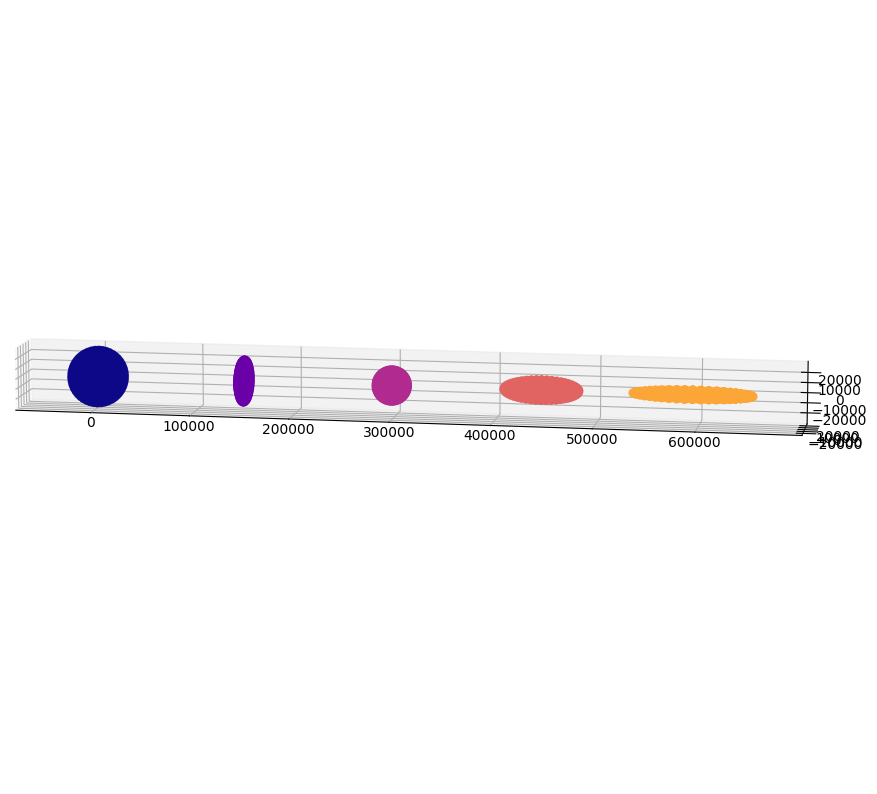

In [11]:
mesh_sequence_vertices = viz.offset_mesh_sequence(parameterized_geod)
viz.plot_mesh_sequence(mesh_sequence_vertices)

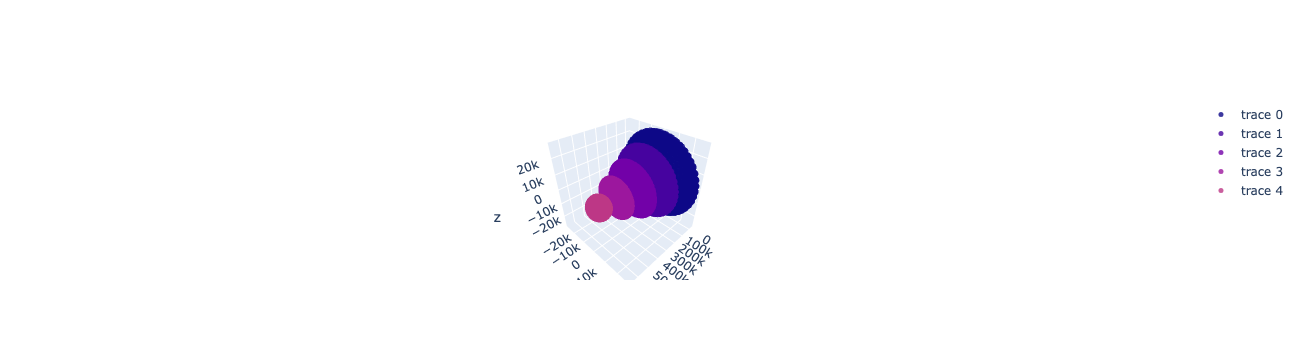

In [12]:
viz.plotly_mesh_sequence(mesh_sequence_vertices)

## Unparameterized

FIXME: This code does not create a geodesic: all the points along the geodesics are the same.

In [13]:
start_mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
end_mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[5, 2, 2]
)

(
    unparameterized_geod,
    unparameterized_faces,
) = synthetic.generate_unparameterized_geodesic(
    start_mesh=start_mesh, end_mesh=end_mesh, gpu_id=1
)

before starting: Vertices then Faces for S then T
(642, 3) (1280, 3)
(642, 3) (1280, 3)


OSError: /home/adele/.cache/keops2.1.2/Linux_frank_5.15.0-70-generic_p3.10.12/nvrtc_jit.so: cannot open shared object file: No such file or directory

In [ ]:
geod = unparameterized_geod
faces = unparameterized_faces

print(geod.shape)
print(faces.shape)

mesh1 = trimesh.Trimesh(vertices=geod[0], faces=faces)
mesh2 = trimesh.Trimesh(vertices=geod[1], faces=faces)
mesh3 = trimesh.Trimesh(vertices=geod[2], faces=faces)
mesh4 = trimesh.Trimesh(vertices=geod[3], faces=faces)
mesh5 = trimesh.Trimesh(vertices=geod[4], faces=faces)

In [ ]:
mesh1.show()

In [ ]:
mesh_sequence_vertices = viz.offset_mesh_sequence(unparameterized_geod)
viz.plot_mesh_sequence(mesh_sequence_vertices)

In [ ]:
viz.plotly_mesh_sequence(mesh_sequence_vertices)

## Inspect geodesics from `data/synthetic` folder

In [14]:
data_dir = default_config.synthetic_data_dir
os.listdir(data_dir)

['geodesic_sphere_ellipsoid_5_subs2_ell[2, 2, 3]_noise0.0',
 'ellipsoid_subs2_ell[2, 2, 3]',
 'sphere_subs2_ell[2, 2, 3]']

In [15]:
geodesic_dirname = "geodesic_sphere_ellipsoid_5_subs2_ell[2, 2, 10]_noise0.0"
geodesic_dir = os.path.join(data_dir, geodesic_dirname)

In [16]:
os.listdir(geodesic_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/home/adele/code/my28brains/my28brains/data/synthetic/geodesic_sphere_ellipsoid_5_subs2_ell[2, 2, 10]_noise0.0'

In [17]:
mesh_sequence_vertices = np.load(
    os.path.join(geodesic_dir, "mesh_sequence_vertices.npy")
)
mesh_sequence_vertices = viz.offset_mesh_sequence(mesh_sequence_vertices)

FileNotFoundError: [Errno 2] No such file or directory: '/home/adele/code/my28brains/my28brains/data/synthetic/geodesic_sphere_ellipsoid_5_subs2_ell[2, 2, 10]_noise0.0/mesh_sequence_vertices.npy'

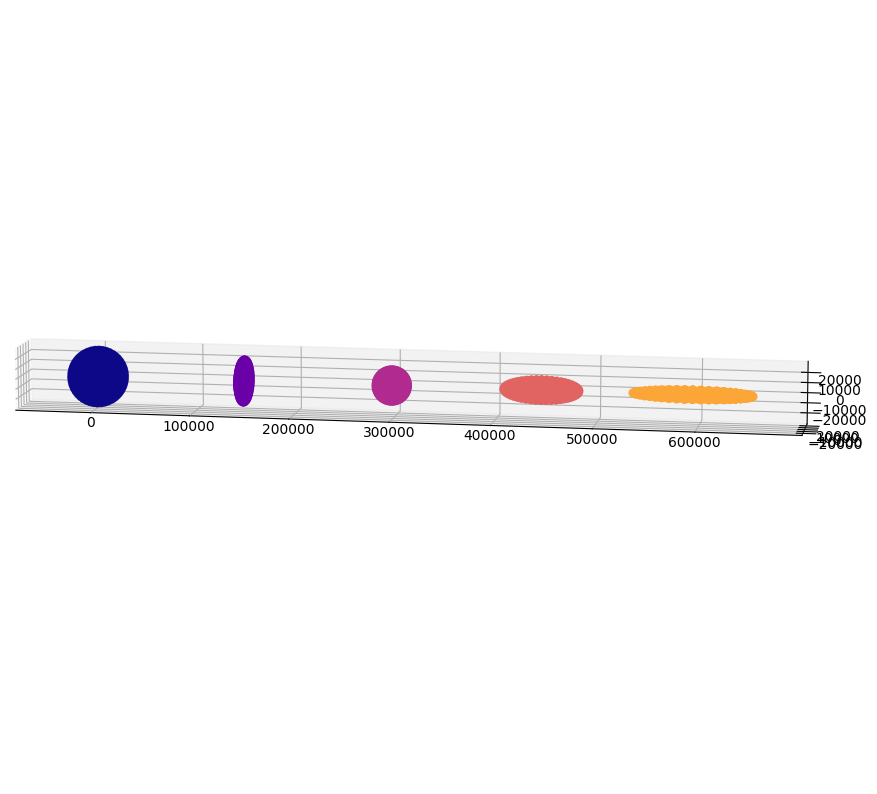

In [18]:
viz.plot_mesh_sequence(mesh_sequence_vertices)

In [ ]:
import geomstats.backend as gs

mesh_sequence_vertices = gs.array(np.load(
    os.path.join(geodesic_dir, "mesh_sequence_vertices.npy")
))
mesh_sequence_vertices = data_utils.add_noise(mesh_sequence_vertices, noise_factor=0.1)
mesh_sequence_vertices = viz.offset_mesh_sequence(mesh_sequence_vertices)

In [ ]:
mesh_sequence_vertices = [mesh.numpy() for mesh in mesh_sequence_vertices]
viz.plot_mesh_sequence(mesh_sequence_vertices)

# Inspect generation of q_end from q_start

In [ ]:
noise_factor = 0.01
subdivisions = 2

def plot_q_start_q_end(noise_factor, subdivisions):

    reference_mesh = synthetic.generate_ellipsoid_mesh(
        subdivisions=subdivisions, ellipsoid_dims=[2, 2, 3]
    )
    reference_vertices = gs.array(reference_mesh.vertices)
    reference_faces = reference_mesh.faces
    n_vertices = len(reference_vertices)
    n_faces = len(reference_faces)
    diameter = data_utils.mesh_diameter(reference_vertices)
    
    noiseless_vertices = gs.copy(reference_vertices)
    noisy_vertices = data_utils.add_noise(
        mesh_sequence_vertices=[reference_vertices],
        noise_factor=noise_factor,
    )
    noisy_vertices = noisy_vertices[0]

    #new
    mesh_sequence_vertices = gs.stack([noiseless_vertices, noisy_vertices])
    print(mesh_sequence_vertices.shape)
    mesh_sequence_vertices = viz.offset_mesh_sequence(mesh_sequence_vertices)
    mesh_sequence_vertices = [mesh.numpy() for mesh in mesh_sequence_vertices]
    viz.plot_mesh_sequence(mesh_sequence_vertices)

In [ ]:
noise_factor = 0.01
subdivisions = 2
plot_q_start_q_end(noise_factor, subdivisions)

In [ ]:
noise_factor = 1
subdivisions = 2
plot_q_start_q_end(noise_factor, subdivisions)

In [ ]:
noise_factor = 0.5
subdivisions = 2
plot_q_start_q_end(noise_factor, subdivisions)

# BVP geodesic creation does  not evolve with n_steps = 3

In [8]:
n_times = 5
noise_factor = 0.5
subdivisions = 2

reference_mesh = synthetic.generate_ellipsoid_mesh(
    subdivisions=subdivisions, ellipsoid_dims=[2, 2, 3]
)
reference_vertices = gs.array(reference_mesh.vertices)
reference_faces = reference_mesh.faces
n_vertices = len(reference_vertices)
n_faces = len(reference_faces)
diameter = data_utils.mesh_diameter(reference_vertices)

noiseless_vertices = gs.copy(reference_vertices)
noisy_vertices = data_utils.add_noise(
    mesh_sequence_vertices=[reference_vertices],
    noise_factor=noise_factor,
)
noisy_vertices = noisy_vertices[0]

discrete_surfaces = DiscreteSurfaces(faces=gs.array(reference_faces))
elastic_metric = ElasticMetric(space=discrete_surfaces)
elastic_metric.exp_solver = _ExpSolver(n_steps=3)

geodesic_fn = elastic_metric.geodesic(
    initial_point=noiseless_vertices, end_point=noisy_vertices
)
geodesic = geodesic_fn(gs.linspace(0, 1, n_times))

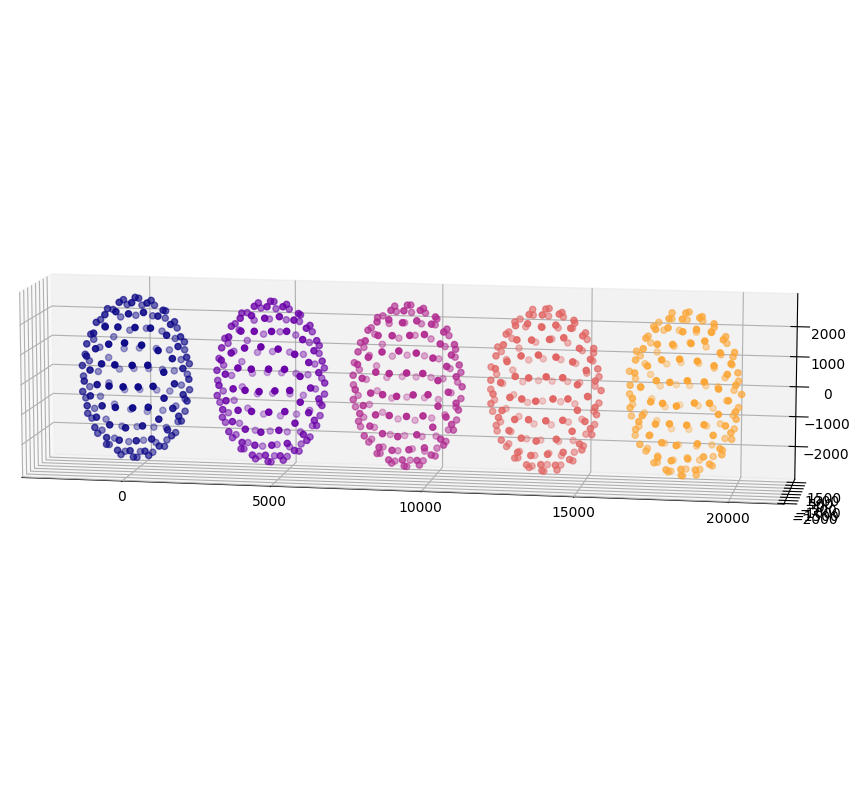

In [6]:
geodesic_viz = viz.offset_mesh_sequence(geodesic)
geodesic_viz = [mesh.numpy() for mesh in geodesic_viz]
viz.plot_mesh_sequence(geodesic_viz)

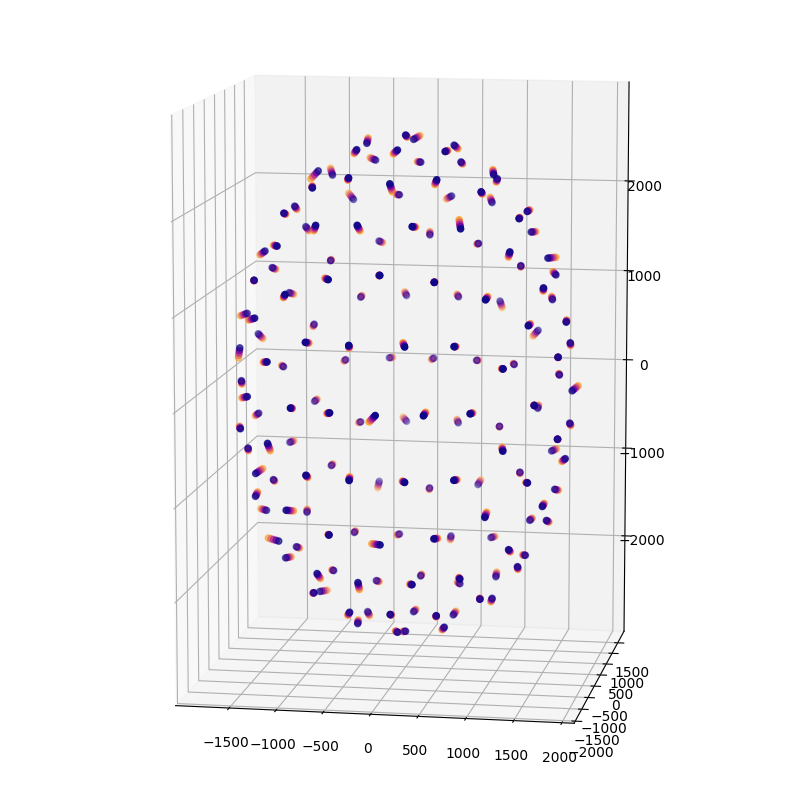

In [7]:
viz.plot_mesh_sequence(geodesic)

# Show that current line creation (labeled backwards_line) puts q_end at the start

In [8]:
n_times = 5
noise_factor = 0.5
subdivisions = 2

reference_mesh = synthetic.generate_ellipsoid_mesh(
    subdivisions=subdivisions, ellipsoid_dims=[2, 2, 3]
)
reference_vertices = gs.array(reference_mesh.vertices)
reference_faces = reference_mesh.faces
n_vertices = len(reference_vertices)
n_faces = len(reference_faces)
diameter = data_utils.mesh_diameter(reference_vertices)

noiseless_vertices = gs.copy(reference_vertices)
noisy_vertices = data_utils.add_noise(
    mesh_sequence_vertices=[reference_vertices],
    noise_factor=noise_factor,
)
noisy_vertices = noisy_vertices[0]

In [9]:
line = gs.array(
    [
        t * noisy_vertices + (1 - t) * noiseless_vertices
        for t in gs.linspace(0, 1, n_times)
    ]
)

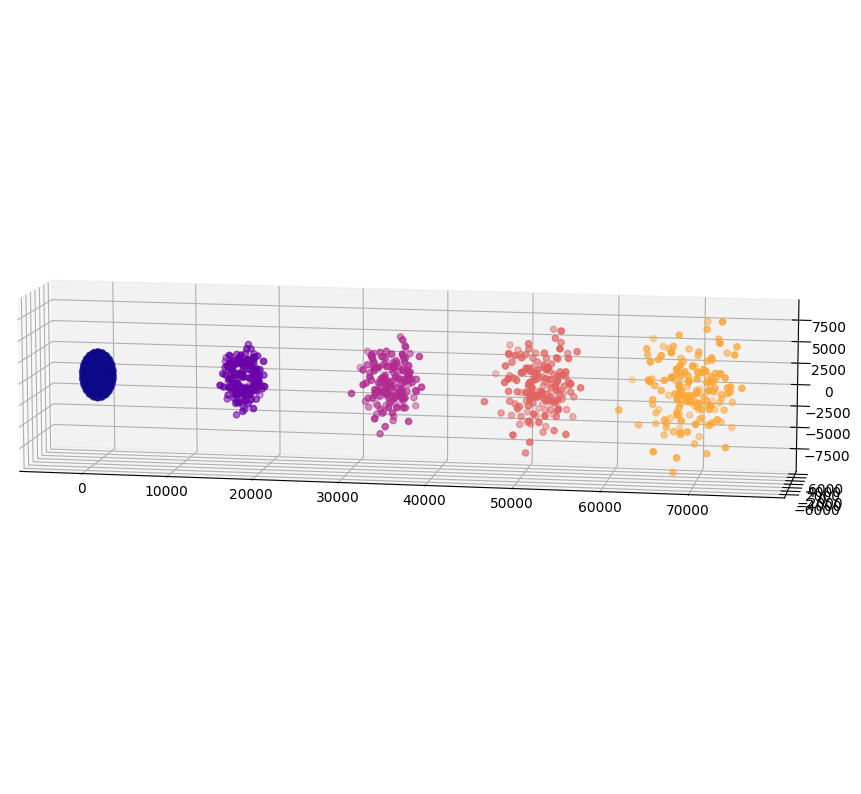

In [10]:
line_viz = viz.offset_mesh_sequence(line)
line_viz = [mesh.numpy() for mesh in line_viz]
viz.plot_mesh_sequence(line_viz, savefig=True, label = "line_noise_0.5")

In [8]:
backwards_line = gs.array(
    [
        t * noiseless_vertices + (1 - t) * noisy_vertices
        for t in gs.linspace(0, 1, n_times)
    ]
)

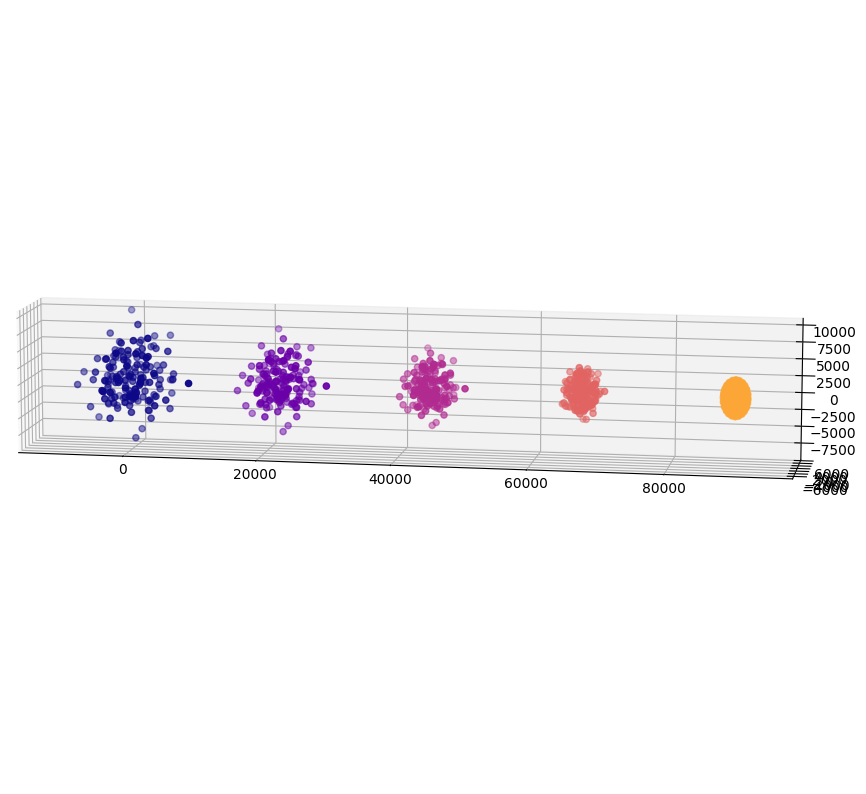

In [9]:
line_viz = viz.offset_mesh_sequence(backwards_line)
line_viz = [mesh.numpy() for mesh in line_viz]
viz.plot_mesh_sequence(line_viz)

# We should be creating geodesic with IVP (initial value problem) instead of BVP (boundary value problem)

## Because as you can see, the bvp geodesic does not evolve, while the IVP geodesic does!

In [13]:
n_times = 5
noise_factor = 0.5
subdivisions = 2

reference_mesh = synthetic.generate_ellipsoid_mesh(
    subdivisions=subdivisions, ellipsoid_dims=[2, 2, 3]
)
reference_vertices = gs.array(reference_mesh.vertices)
reference_faces = reference_mesh.faces
n_vertices = len(reference_vertices)
n_faces = len(reference_faces)
diameter = data_utils.mesh_diameter(reference_vertices)

noiseless_vertices = gs.copy(reference_vertices)
noisy_vertices = data_utils.add_noise(
    mesh_sequence_vertices=[reference_vertices],
    noise_factor=noise_factor,
)
noisy_vertices = noisy_vertices[0]

discrete_surfaces = DiscreteSurfaces(faces=gs.array(reference_faces))
elastic_metric = ElasticMetric(space=discrete_surfaces)
elastic_metric.exp_solver = _ExpSolver(n_steps=3)

true_coef = noiseless_vertices - noisy_vertices

geodesic_fn = elastic_metric.geodesic(
    initial_point=noiseless_vertices, initial_tangent_vec=true_coef
)
# geodesic_fn = elastic_metric.geodesic(
#     initial_point=noiseless_vertices, end_point=noisy_vertices
# )
geodesic = geodesic_fn(gs.linspace(0, 1, n_times))

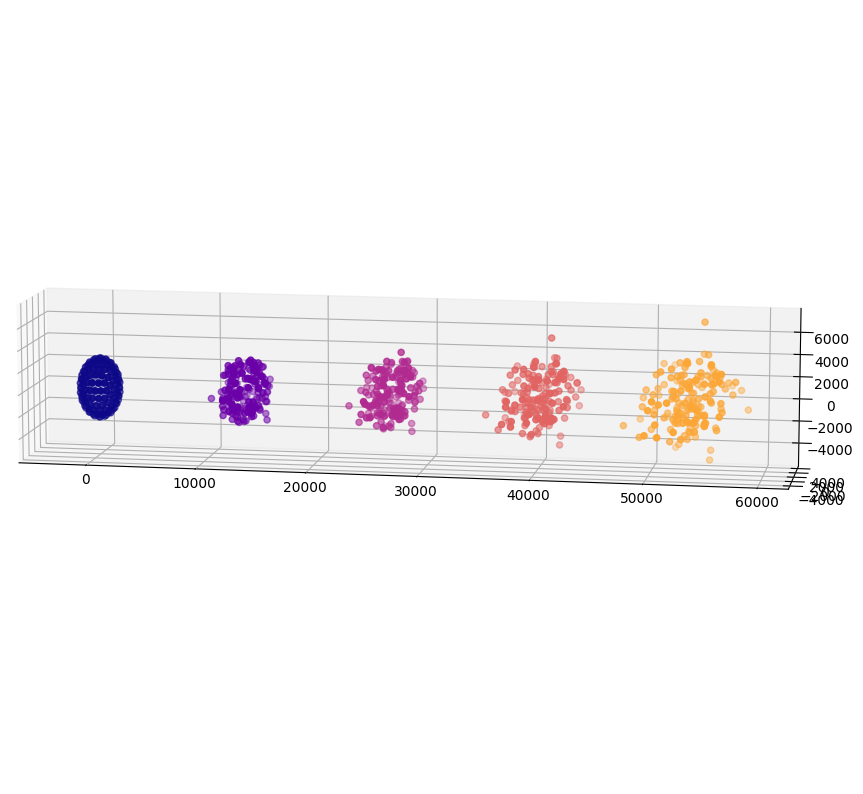

In [14]:
geodesic_viz = viz.offset_mesh_sequence(geodesic)
geodesic_viz = [mesh.numpy() for mesh in geodesic_viz]
viz.plot_mesh_sequence(geodesic_viz, savefig=True, label = "geodesic_noise_0.5")